In [21]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=f5acf101fba8a814201442c55829604f2c9bd77ba750a80f4249d5f6e87a62c3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [22]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import string
from gensim.models.coherencemodel import CoherenceModel
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import csv
from csv import reader
tit = []
with open("/content/COVID-19_title.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
print(len(tit))

242108


In [5]:
print(tit[:1000])

[['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia'], ['nitric oxide pro-inflammatory mediator lung diseas'], ['surfactant protein-d pulmonary host defens'], ['role endothelin-1 lung diseas'], ['gene expression epithelial cells response pneumovirus infect'], ['sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi'], ['debate transfusing normal haemoglobin levels improve outcom'], ['21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001'], ['heme oxygenase-1 carbon monoxide pulmonary medicin'], ['technical description rods real-time public health surveillance system'], ['conservation polyamine regulation translational frameshifting yeast mamm'], ['heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus'], ['method identify domain interacting protein'], ['vaccinia virus infection disrupts microtubule organization centrosome f

In [6]:
val = []
for i in tit:
  val.append(i[0])

In [ ]:
train, test = train_test_split(val, test_size=0.5, random_state=42)

In [7]:
print(test[:100])

NameError: ignored

In [ ]:
print(len(test))

121054


In [8]:

#on train set, u split and see how it goes
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]


In [17]:
#number of passes = 40

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=11, 
                                           random_state=100,
                                           update_every=3,
                                           chunksize=100,
                                           passes=40,
                                           alpha='auto',
                                           per_word_topics=True)
top11_ = lda_model.print_topics(num_topics=11, num_words=7)

c = 0
for i in top11_:

  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.037*"detection" + 0.032*"using" + 0.022*"molecular" + 0.020*"diseases" + 0.019*"rapid" + 0.019*"high" + 0.018*"middle"')
Topic 2
(1, '0.028*"time" + 0.020*"approach" + 0.019*"hospital" + 0.017*"evaluation" + 0.015*"effect" + 0.014*"first" + 0.011*"strategies"')
Topic 3
(2, '0.079*"viral" + 0.017*"current" + 0.013*"bronchitis" + 0.013*"post" + 0.013*"severity" + 0.011*"chronic" + 0.008*"fever"')
Topic 4
(3, '0.085*"sars" + 0.075*"cov" + 0.070*"2" + 0.052*"pandemic" + 0.044*"health" + 0.016*"pati" + 0.014*"public"')
Topic 5
(4, '0.036*"role" + 0.023*"non" + 0.021*"development" + 0.019*"chapter" + 0.015*"expression" + 0.015*"gene" + 0.012*"mediated"')
Topic 6
(5, '0.051*"clinical" + 0.043*"novel" + 0.037*"influenza" + 0.027*"treatment" + 0.027*"potential" + 0.014*"2020" + 0.013*"united"')
Topic 7
(6, '0.033*"response" + 0.022*"cancer" + 0.020*"immune" + 0.019*"vaccine" + 0.016*"surgery" + 0.012*"responses" + 0.012*"future"')
Topic 8
(7, '0.054*"respiratory" + 0.053*"patient

In [18]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Perplexity:  -8.648406484014393


In [25]:
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.415994 -0.167080       1        1  18.207445
7      0.110411  0.426316       2        1  13.275246
3      0.029556  0.026181       3        1  11.584436
9     -0.016366 -0.009829       4        1  10.397690
10    -0.049533 -0.036496       5        1   9.179350
5     -0.067383 -0.035390       6        1   7.666299
1     -0.071637 -0.036918       7        1   6.850300
0     -0.082100 -0.038371       8        1   6.393049
6     -0.083366 -0.042771       9        1   6.215475
4     -0.092955 -0.043357      10        1   5.502404
2     -0.092621 -0.042284      11        1   4.728306, topic_info=           Term          Freq         Total Category  logprob  loglift
9920      covid  93927.000000  93927.000000  Default  30.0000  30.0000
8597         19  91763.000000  91763.000000  Default  29.0000  29.0000
1202       sars  23145.000000  23145.000000  Default  28.0000  28.0000
92        virus  18910.000000  18910.000000  Default  27.0000  27.0000
1201        cov  20420.000000  20420.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
5987         re    534.998654    535.877583  Topic11  -5.3310   3.0500
626   signaling    532.154632    533.033533  Topic11  -5.3363   3.0500
2955   spectrum    527.315806    528.194718  Topic11  -5.3454   3.0499
479     epitope    491.839177    492.718113  Topic11  -5.4151   3.0498
1946    symptom    488.031395    488.910311  Topic11  -5.4229   3.0498

[360 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
27         5  0.999647      1
8597       1  0.999991     19
268        3  0.999935      2
8598       1  0.999956   2019
9575       6  0.999604   2020
...      ...       ...    ...
1949       1  0.999669   with
412        3  0.999055  world
15410      1  0.999711  wuhan
429        7  0.999299   year
3103       4  0.999560  young

[330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 4, 10, 11, 6, 2, 1, 7, 5, 3])

In [16]:
#number of passes = 40
'''
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=30,
                                           chunksize=100,
                                           passes=40,
                                           alpha='auto',
                                           per_word_topics=True)'''
top8_ = lda_model.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8_:

  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.106*"coronavirus" + 0.062*"disease" + 0.042*"2019" + 0.030*"novel" + 0.016*"potential" + 0.009*"implications" + 0.007*"activity"')
Topic 2
(1, '0.117*"sars" + 0.103*"cov" + 0.099*"2" + 0.014*"2020" + 0.010*"testing" + 0.009*"practice" + 0.007*"world"')
Topic 3
(2, '0.213*"covid" + 0.208*"19" + 0.031*"pandemic" + 0.024*"pandem" + 0.012*"impact" + 0.011*"during" + 0.011*"management"')
Topic 4
(3, '0.026*"surgery" + 0.020*"single" + 0.016*"surgical" + 0.015*"lockdown" + 0.015*"laparoscopic" + 0.009*"coronaviruses" + 0.008*"home"')
Topic 5
(4, '0.013*"real" + 0.012*"assay" + 0.011*"imaging" + 0.011*"stroke" + 0.009*"pcr" + 0.009*"time" + 0.009*"rt"')
Topic 6
(5, '0.035*"health" + 0.025*"care" + 0.019*"outbreak" + 0.017*"china" + 0.012*"among" + 0.011*"epidemic" + 0.011*"control"')
Topic 7
(6, '0.039*"virus" + 0.018*"human" + 0.013*"viral" + 0.013*"protein" + 0.011*"cell" + 0.011*"based" + 0.010*"model"')
Topic 8
(7, '0.036*"patients" + 0.027*"respiratory" + 0.021*"infection"

In [13]:
#passes 10
'''lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)'''
top8_ = lda_model.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8_:

  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.092*"virus" + 0.029*"protein" + 0.016*"porcine" + 0.015*"molecular" + 0.012*"host" + 0.011*"like" + 0.010*"characterization"')
Topic 2
(1, '0.051*"sars" + 0.045*"cov" + 0.033*"disease" + 0.027*"health" + 0.024*"pandem" + 0.021*"2019" + 0.015*"china"')
Topic 3
(2, '0.020*"antiviral" + 0.020*"middle" + 0.019*"east" + 0.017*"chapter" + 0.015*"activity" + 0.014*"current" + 0.012*"inhibitors"')
Topic 4
(3, '0.237*"covid" + 0.232*"19" + 0.036*"pandemic" + 0.019*"care" + 0.008*"cancer" + 0.006*"implications" + 0.005*"pulmonary"')
Topic 5
(4, '0.079*"2" + 0.035*"human" + 0.023*"detection" + 0.020*"cell" + 0.011*"development" + 0.011*"evaluation" + 0.011*"cells"')
Topic 6
(5, '0.035*"viral" + 0.026*"influenza" + 0.023*"infectious" + 0.020*"response" + 0.019*"potential" + 0.019*"infections" + 0.014*"viruses"')
Topic 7
(6, '0.027*"based" + 0.026*"analysis" + 0.020*"using" + 0.017*"system" + 0.017*"epidemic" + 0.015*"diseas" + 0.014*"model"')
Topic 8
(7, '0.064*"coronavirus" + 0.042

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=8, random_state=100, update_every=1, chunksize=1000, passes=10,alpha='auto', per_word_topics=True)

In [11]:
#passes 10
'''lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=8, random_state=100, update_every=1, chunksize=1000, passes=10,alpha='auto', per_word_topics=True)'''
top8_10 = lda_model.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8_10:

  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.029*"detection" + 0.027*"using" + 0.017*"molecular" + 0.017*"social" + 0.016*"data" + 0.014*"lessons" + 0.014*"like"')
Topic 2
(1, '0.067*"sars" + 0.059*"cov" + 0.038*"disease" + 0.033*"health" + 0.029*"pandem" + 0.024*"2019" + 0.018*"outbreak"')
Topic 3
(2, '0.099*"2" + 0.033*"china" + 0.021*"cell" + 0.017*"related" + 0.015*"cancer" + 0.015*"diseases" + 0.012*"spike"')
Topic 4
(3, '0.175*"covid" + 0.171*"19" + 0.028*"respiratory" + 0.027*"pandemic" + 0.015*"acute" + 0.014*"novel" + 0.012*"care"')
Topic 5
(4, '0.085*"coronavirus" + 0.032*"clinical" + 0.028*"viral" + 0.025*"review" + 0.017*"role" + 0.017*"infections" + 0.017*"management"')
Topic 6
(5, '0.067*"virus" + 0.040*"infection" + 0.030*"human" + 0.024*"impact" + 0.022*"infect" + 0.021*"influenza" + 0.020*"infectious"')
Topic 7
(6, '0.037*"analysis" + 0.032*"based" + 0.025*"risk" + 0.020*"among" + 0.014*"medical" + 0.014*"approach" + 0.013*"rapid"')
Topic 8
(7, '0.066*"patients" + 0.026*"syndrome" + 0.025*"severe" 

In [ ]:
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.16, passes=40,chunksize=10000,per_word_topics=True)


In [ ]:
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherence_model_lda.get_coherence())

0.4506317452293678


In [ ]:
x_train = []
y_train = []
for i in range(30,40):
  print(i)
  x_train.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.16, passes=i,chunksize=10000,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_train.append(h)
  print("------------------")

In [ ]:


tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]



In [ ]:
#passes 1
#gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.9, passes=10,chunksize=500,per_word_topics=True)
top8_10 = lda.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8_10:

  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.055*"virus" + 0.023*"human" + 0.018*"infect" + 0.017*"protein" + 0.013*"cell" + 0.013*"potential" + 0.012*"viral"')
Topic 2
(1, '0.251*"covid" + 0.246*"19" + 0.062*"sars" + 0.055*"cov" + 0.052*"2" + 0.028*"pandem" + 0.011*"response"')
Topic 3
(2, '0.040*"health" + 0.012*"model" + 0.012*"global" + 0.011*"public" + 0.010*"emerging" + 0.010*"medical" + 0.010*"care"')
Topic 4
(3, '0.028*"based" + 0.023*"detection" + 0.021*"children" + 0.020*"using" + 0.019*"infections" + 0.019*"study" + 0.019*"time"')
Topic 5
(4, '0.061*"patients" + 0.055*"respiratory" + 0.031*"acute" + 0.026*"review" + 0.026*"syndrome" + 0.024*"severe" + 0.023*"clinical"')
Topic 6
(5, '0.028*"associated" + 0.023*"role" + 0.023*"treatment" + 0.021*"system" + 0.018*"diseas" + 0.016*"effects" + 0.012*"effect"')
Topic 7
(6, '0.073*"coronavirus" + 0.042*"disease" + 0.042*"pandemic" + 0.034*"infection" + 0.026*"2019" + 0.022*"novel" + 0.020*"china"')
Topic 8
(7, '0.030*"analysis" + 0.021*"pneumonia" + 0.019*"epid

In [ ]:
#passes 1
#gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.9, passes=1,chunksize=100,per_word_topics=True)
top8_1 = lda.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8_1:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.083*"coronavirus" + 0.075*"cov" + 0.029*"human" + 0.026*"novel" + 0.018*"detection" + 0.017*"using" + 0.011*"viruses"')
Topic 2
(1, '0.074*"sars" + 0.042*"disease" + 0.037*"health" + 0.021*"review" + 0.018*"case" + 0.018*"infectious" + 0.012*"public"')
Topic 3
(2, '0.190*"covid" + 0.186*"19" + 0.029*"pandemic" + 0.021*"pandem" + 0.014*"impact" + 0.013*"china" + 0.013*"care"')
Topic 4
(3, '0.100*"2" + 0.022*"cell" + 0.021*"response" + 0.018*"diseas" + 0.017*"related" + 0.013*"host" + 0.012*"immune"')
Topic 5
(4, '0.049*"patients" + 0.045*"respiratory" + 0.026*"clinical" + 0.023*"acute" + 0.019*"syndrome" + 0.019*"severe" + 0.015*"risk"')
Topic 6
(5, '0.041*"2019" + 0.038*"analysis" + 0.032*"based" + 0.020*"system" + 0.014*"approach" + 0.013*"high" + 0.013*"data"')
Topic 7
(6, '0.024*"protein" + 0.022*"role" + 0.015*"non" + 0.015*"cancer" + 0.014*"effects" + 0.014*"lung" + 0.012*"like"')
Topic 8
(7, '0.078*"virus" + 0.047*"infection" + 0.032*"viral" + 0.025*"infect" + 0.01

In [ ]:
#passes 1
top8 = lda.print_topics(num_topics=8, num_words=7)

c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.009*"wuhan" + 0.008*"angiotensin" + 0.008*"infection" + 0.008*"cell" + 0.007*"system" + 0.007*"coronavirus" + 0.007*"lung"')
Topic 2
(1, '0.089*"covid" + 0.087*"19" + 0.021*"pandemic" + 0.020*"health" + 0.019*"pandem" + 0.013*"disease" + 0.013*"care"')
Topic 3
(2, '0.021*"virus" + 0.016*"review" + 0.016*"influenza" + 0.014*"infectious" + 0.012*"human" + 0.009*"systematic" + 0.008*"epidemic"')
Topic 4
(3, '0.023*"middle" + 0.021*"east" + 0.016*"spike" + 0.013*"transplant" + 0.013*"single" + 0.006*"mers" + 0.006*"storm"')
Topic 5
(4, '0.050*"respiratory" + 0.039*"coronavirus" + 0.027*"acute" + 0.023*"syndrome" + 0.022*"severe" + 0.018*"disease" + 0.018*"2019"')
Topic 6
(5, '0.049*"covid" + 0.047*"19" + 0.038*"patients" + 0.018*"studi" + 0.015*"clinical" + 0.010*"study" + 0.009*"among"')
Topic 7
(6, '0.054*"sars" + 0.048*"cov" + 0.045*"2" + 0.027*"virus" + 0.014*"protein" + 0.012*"coronavirus" + 0.008*"human"')
Topic 8
(7, '0.154*"covid" + 0.151*"19" + 0.010*"pandemic" + 0.

In [ ]:
#passes 1
top11 = lda.print_topics(num_topics=11, num_words=7)

c = 0
for i in top11:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.026*"virus" + 0.020*"infectious" + 0.017*"health" + 0.009*"emerging" + 0.008*"chapter" + 0.007*"research" + 0.007*"diseases"')
Topic 2
(1, '0.012*"wuhan" + 0.009*"1" + 0.008*"italy" + 0.007*"antiviral" + 0.007*"hiv" + 0.006*"synthesis" + 0.005*"drug"')
Topic 3
(2, '0.025*"patients" + 0.019*"acute" + 0.016*"case" + 0.016*"respiratory" + 0.016*"severe" + 0.013*"pneumonia" + 0.012*"associated"')
Topic 4
(3, '0.051*"covid" + 0.050*"19" + 0.036*"coronavirus" + 0.025*"disease" + 0.023*"2019" + 0.013*"china" + 0.010*"novel"')
Topic 5
(4, '0.009*"learning" + 0.007*"oncology" + 0.006*"society" + 0.006*"head" + 0.006*"manifestations" + 0.006*"using" + 0.005*"deep"')
Topic 6
(5, '0.027*"respiratory" + 0.023*"virus" + 0.018*"viral" + 0.013*"detection" + 0.013*"infections" + 0.012*"human" + 0.011*"viruses"')
Topic 7
(6, '0.056*"sars" + 0.050*"cov" + 0.047*"2" + 0.022*"coronavirus" + 0.014*"virus" + 0.013*"syndrome" + 0.012*"respiratory"')
Topic 8
(7, '0.151*"covid" + 0.148*"19" + 0.0

In [ ]:
#passes 1
#coherencevalue 0.40689919802460944

top20 = lda.print_topics(num_topics=20, num_words=7)

c = 0
for i in top20:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.017*"based" + 0.014*"united" + 0.013*"learning" + 0.013*"social" + 0.013*"using" + 0.012*"surveillance" + 0.012*"home"')
Topic 2
(1, '0.227*"covid" + 0.222*"19" + 0.030*"pandemic" + 0.025*"pandem" + 0.022*"health" + 0.012*"impact" + 0.011*"during"')
Topic 3
(2, '0.035*"infectious" + 0.027*"emerging" + 0.027*"diseases" + 0.020*"chapter" + 0.015*"future" + 0.011*"feline" + 0.010*"research"')
Topic 4
(3, '0.057*"virus" + 0.016*"human" + 0.015*"infection" + 0.011*"cytokine" + 0.011*"letter" + 0.010*"coronavirus" + 0.009*"call"')
Topic 5
(4, '0.159*"sars" + 0.139*"cov" + 0.131*"2" + 0.019*"infection" + 0.016*"east" + 0.015*"middle" + 0.014*"mers"')
Topic 6
(5, '0.033*"cell" + 0.021*"transplant" + 0.020*"long" + 0.017*"liver" + 0.017*"term" + 0.017*"lung" + 0.010*"stem"')
Topic 7
(6, '0.021*"2020" + 0.016*"pandemia" + 0.016*"beyond" + 0.010*"exposure" + 0.008*"vitamin" + 0.008*"outpatient" + 0.007*"frontline"')
Topic 8
(7, '0.061*"patients" + 0.025*"case" + 0.024*"care" + 0.02

In [ ]:
#passes 1
#coherencevalue 0.40689919802460944

top100 = lda.print_topics(num_topics=100, num_words=7)

c = 0
for i in top100:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.252*"impact" + 0.089*"evidence" + 0.054*"network" + 0.050*"cardiac" + 0.040*"dynamics" + 0.026*"regarding" + 0.025*"based"')
Topic 2
(1, '0.078*"neonatal" + 0.066*"complications" + 0.042*"dairy" + 0.037*"l" + 0.036*"2010" + 0.035*"neurosurgical" + 0.034*"second"')
Topic 3
(2, '0.101*"transplant" + 0.088*"cell" + 0.066*"stress" + 0.057*"function" + 0.032*"renal" + 0.030*"venous" + 0.026*"hematopoietic"')
Topic 4
(3, '0.207*"global" + 0.119*"experience" + 0.054*"illness" + 0.046*"year" + 0.032*"roles" + 0.031*"simulation" + 0.028*"disaster"')
Topic 5
(4, '0.298*"viral" + 0.090*"host" + 0.076*"identification" + 0.069*"infect" + 0.044*"proteins" + 0.044*"bovine" + 0.026*"genomic"')
Topic 6
(5, '0.105*"long" + 0.091*"term" + 0.083*"quality" + 0.075*"life" + 0.055*"car" + 0.052*"hong" + 0.052*"kong"')
Topic 7
(6, '0.131*"healthcare" + 0.121*"among" + 0.088*"workers" + 0.044*"group" + 0.043*"canine" + 0.040*"relationship" + 0.038*"distancing"')
Topic 8
(7, '0.110*"future" + 0.0

In [ ]:
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
print(coherence_model_lda.get_coherence())

0.4261290524931911


In [ ]:
#number of topics
x = []
y = []
for i in range(4,100):
  print(i)
  x.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary, alpha=0.16, passes=1,chunksize=10000,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y.append(h)
  print("------------------")

4
0.3343063162745482
------------------
5
0.3794432884604665
------------------
6
0.3505229923284295
------------------
7
0.39199106595893246
------------------
8
0.3563004320929499
------------------
9
0.3617615595313563
------------------
10
0.37722988777549493
------------------
11
0.44598294931554255
------------------
12
0.4033769448827614
------------------
13
0.4156630399082647
------------------
14
0.3932255593869693
------------------
15
0.39479443774537326
------------------
16
0.40332699292376706
------------------
17
0.40541208624694625
------------------
18
0.3936155840151633
------------------
19
0.38059116662263254
------------------
20
0.41863756443018146
------------------
21
0.3999027508087901
------------------
22
0.3835970238129271
------------------
23
0.3869332357686266
------------------
24
0.39845914811017874
------------------
25
0.3893709964264394
------------------
26
0.36548466196084506
------------------
27
0.37874023749250035
------------------
28
0.373818

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


0.4583703914266554
------------------
92
0.47003597796168906
------------------
93
0.46299262390219
------------------
94
0.4664057414886057
------------------
95
0.4686180869557416
------------------
96
0.46389070612781297
------------------
97
0.47456646466965263
------------------
98
0.47582132718976233
------------------
99
0.48467316025055196
------------------


In [ ]:
print(x, y)

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] [0.3343063162745482, 0.3794432884604665, 0.3505229923284295, 0.39199106595893246, 0.3563004320929499, 0.3617615595313563, 0.37722988777549493, 0.44598294931554255, 0.4033769448827614, 0.4156630399082647, 0.3932255593869693, 0.39479443774537326, 0.40332699292376706, 0.40541208624694625, 0.3936155840151633, 0.38059116662263254, 0.41863756443018146, 0.3999027508087901, 0.3835970238129271, 0.3869332357686266, 0.39845914811017874, 0.3893709964264394, 0.36548466196084506, 0.37874023749250035, 0.37381884677384825, 0.37674874211783466, 0.39303312405734747, 0.40370342536847764, 0.3864965073855, 0.3912633907150763, 0.393794

In [ ]:
x = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
y = [0.3343063162745482, 0.3794432884604665, 0.3505229923284295, 0.39199106595893246, 0.3563004320929499, 0.3617615595313563, 0.37722988777549493, 0.44598294931554255, 0.4033769448827614, 0.4156630399082647, 0.3932255593869693, 0.39479443774537326, 0.40332699292376706, 0.40541208624694625, 0.3936155840151633, 0.38059116662263254, 0.41863756443018146, 0.3999027508087901, 0.3835970238129271, 0.3869332357686266, 0.39845914811017874, 0.3893709964264394, 0.36548466196084506, 0.37874023749250035, 0.37381884677384825, 0.37674874211783466, 0.39303312405734747, 0.40370342536847764, 0.3864965073855, 0.3912633907150763, 0.3937944027096365, 0.3823303521143436, 0.40007633872528836, 0.39040269513430814, 0.37937838230216336, 0.40069516456285237, 0.383951365675638, 0.39013213677012193, 0.381099397687947, 0.39438502196551406, 0.38703024557543025, 0.3911473711294997, 0.40854425799067057, 0.37728461807459895, 0.40860032932068213, 0.3963859635381832, 0.4051589745739666, 0.3988624240265264, 0.405302032151754, 0.40147896562941265, 0.4085221359106122, 0.3988599265685184, 0.40536804074899335, 0.4066296150579215, 0.41503374667158915, 0.41782195266941957, 0.41631192213585877, 0.42450011729336257, 0.4105151195501487, 0.4182551396716635, 0.4185217813021433, 0.42214174348255523, 0.4194731631133685, 0.415717082413317, 0.41523842630093943, 0.4111837619249134, 0.42731365533848104, 0.41735933777213347, 0.417249269042373, 0.4320355995525225, 0.430909781846673, 0.4288846864768297, 0.4402603677726564, 0.42483340580734585, 0.4355752177994644, 0.43448557547157834, 0.43813896287472887, 0.4340506230343853, 0.45178791710053345, 0.447227774449226, 0.448198208846962, 0.44607092217980343, 0.44571181166331897, 0.4618971377392494, 0.4594101282092765, 0.46608776212949776, 0.4616474511388218, 0.4583703914266554, 0.47003597796168906, 0.46299262390219, 0.4664057414886057, 0.4686180869557416, 0.46389070612781297, 0.47456646466965263, 0.47582132718976233, 0.48467316025055196]

In [ ]:
print(x[:10], y[:10])

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [0.3343063162745482, 0.3794432884604665, 0.3505229923284295, 0.39199106595893246, 0.3563004320929499, 0.3617615595313563, 0.37722988777549493, 0.44598294931554255, 0.4033769448827614, 0.4156630399082647]


In [ ]:
for i in range(10):
  if y[i] == 0.44598294931554255:
    print(x[i])

11


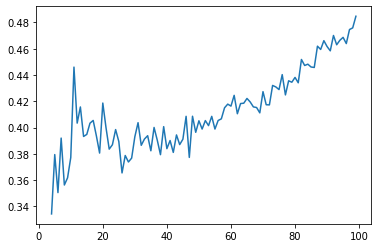

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

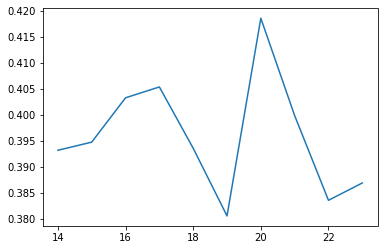

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[10:20],y[10:20])
plt.show()

In [ ]:
#passes 40
#coherencevalue 0.40689919802460944

top15 = lda.print_topics(num_topics=8, num_words=7)

c = 0
for i in top15:

  c += 1
  print("Topic "+str(c))
  print(i)

In [ ]:
#passes 15
#coherencevalue 0.40689919802460944

top15 = lda.print_topics(num_topics=15, num_words=7)

c = 0
for i in top15:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.075*"coronavirus" + 0.052*"disease" + 0.050*"respiratory" + 0.037*"2019" + 0.033*"acute" + 0.029*"patients" + 0.026*"severe"')
Topic 2
(1, '0.222*"covid" + 0.217*"19" + 0.027*"pandemic" + 0.025*"pandem" + 0.015*"patients" + 0.012*"during" + 0.009*"impact"')
Topic 3
(2, '0.054*"virus" + 0.028*"influenza" + 0.026*"detection" + 0.014*"viruses" + 0.014*"human" + 0.012*"infectious" + 0.010*"porcine"')
Topic 4
(3, '0.018*"cell" + 0.016*"angiotensin" + 0.013*"letter" + 0.010*"system" + 0.010*"pulmonary" + 0.010*"editor" + 0.009*"il"')
Topic 5
(4, '0.023*"system" + 0.021*"chapter" + 0.016*"drug" + 0.016*"learning" + 0.013*"based" + 0.012*"coronaviruses" + 0.012*"using"')
Topic 6
(5, '0.028*"virus" + 0.024*"protein" + 0.018*"coronavirus" + 0.014*"viral" + 0.014*"human" + 0.012*"cell" + 0.011*"immune"')
Topic 7
(6, '0.015*"imaging" + 0.012*"initial" + 0.012*"anxiety" + 0.012*"distancing" + 0.011*"social" + 0.008*"contact" + 0.007*"depression"')
Topic 8
(7, '0.022*"emerging" + 0.02

In [ ]:
x = []
y = []
# generate LDA model
for i in range(2,100,2):
  ldamodel = 
  x.append(i)
  coh = coherence_model_lda.get_coherence()
  y.append(coh)


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
print(x,y)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98] [0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.42332548610711535, 0.423325

In [ ]:
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')

In [ ]:
#corpus, num_topics=30, id2word = dictionary, passes=4,chunksize=10000,per_word_topics=True
print(coherence_model_lda.get_coherence())

0.42332548610711535


In [ ]:
#corpus, num_topics=8, id2word = dictionary, passes=4,chunksize=10000,per_word_topics=True
print(coherence_model_lda.get_coherence())

0.37730903446676156


In [ ]:
top16 = ldamodel.print_topics(num_topics=16, num_words=7)

c = 0
for i in top16:

  c += 1
  print("Topic "+str(c))
  print(i)


Topic 1
(0, '0.110*"2" + 0.028*"protein" + 0.022*"virus" + 0.016*"system" + 0.015*"middle" + 0.014*"east" + 0.011*"antiviral"')
Topic 2
(1, '0.023*"surgery" + 0.020*"united" + 0.015*"safety" + 0.015*"post" + 0.013*"hydroxychloroquine" + 0.013*"treat" + 0.012*"states"')
Topic 3
(2, '0.031*"immune" + 0.019*"inhibitors" + 0.019*"multiple" + 0.015*"psychological" + 0.014*"protease" + 0.013*"world" + 0.012*"gastrointestinal"')
Topic 4
(3, '0.093*"coronavirus" + 0.080*"sars" + 0.071*"cov" + 0.056*"respiratory" + 0.041*"disease" + 0.030*"infection" + 0.026*"syndrome"')
Topic 5
(4, '0.023*"current" + 0.022*"future" + 0.014*"services" + 0.013*"common" + 0.012*"beyond" + 0.011*"status" + 0.011*"trends"')
Topic 6
(5, '0.094*"health" + 0.037*"pneumonia" + 0.028*"public" + 0.020*"mental" + 0.020*"social" + 0.018*"care" + 0.016*"community"')
Topic 7
(6, '0.051*"patients" + 0.034*"pati" + 0.025*"with" + 0.022*"studi" + 0.016*"therapy" + 0.016*"severe" + 0.015*"retrospective"')
Topic 8
(7, '0.029*"cel

In [ ]:
top40 = ldamodel.print_topics(num_topics=40, num_words=7)

c = 0
for i in top40:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.038*"changes" + 0.029*"evolution" + 0.027*"strategy" + 0.026*"ace2" + 0.019*"complex" + 0.015*"patterns" + 0.012*"inflammation"')
Topic 2
(1, '0.090*"epidemic" + 0.074*"porcine" + 0.057*"virus" + 0.043*"diarrhea" + 0.037*"specific" + 0.027*"recommendations" + 0.024*"bovine"')
Topic 3
(2, '0.056*"rapid" + 0.053*"evaluation" + 0.049*"2020" + 0.038*"screening" + 0.031*"comparison" + 0.025*"structure" + 0.023*"protease"')
Topic 4
(3, '0.056*"data" + 0.040*"inhibitors" + 0.035*"surgical" + 0.034*"adults" + 0.031*"epidemiology" + 0.027*"epidemiological" + 0.023*"application"')
Topic 5
(4, '0.163*"clinical" + 0.055*"hospital" + 0.050*"early" + 0.047*"characteristics" + 0.037*"patients" + 0.033*"outcomes" + 0.021*"injury"')
Topic 6
(5, '0.345*"2" + 0.040*"surgery" + 0.037*"experience" + 0.034*"single" + 0.025*"understanding" + 0.024*"center" + 0.021*"need"')
Topic 7
(6, '0.096*"case" + 0.071*"patient" + 0.051*"report" + 0.044*"middle" + 0.042*"chapter" + 0.041*"east" + 0.024*"mu

In [ ]:
top10 = ldamodel.print_topics(num_topics=10, num_words=7)

c = 0
for i in top10:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.017*"chapter" + 0.015*"surgery" + 0.011*"bronchitis" + 0.009*"protease" + 0.009*"long" + 0.008*"term" + 0.007*"department"')
Topic 2
(1, '0.013*"medical" + 0.011*"face" + 0.008*"pathogens" + 0.008*"mask" + 0.008*"beyond" + 0.007*"call" + 0.007*"home"')
Topic 3
(2, '0.145*"coronavirus" + 0.032*"novel" + 0.011*"what" + 0.010*"testing" + 0.010*"current" + 0.006*"need" + 0.005*"food"')
Topic 4
(3, '0.042*"respiratory" + 0.031*"patients" + 0.025*"acute" + 0.021*"clinical" + 0.021*"syndrome" + 0.021*"severe" + 0.016*"case"')
Topic 5
(4, '0.068*"pandem" + 0.046*"review" + 0.018*"cancer" + 0.017*"systematic" + 0.017*"during" + 0.014*"from" + 0.014*"pandemic"')
Topic 6
(5, '0.080*"sars" + 0.070*"cov" + 0.066*"2" + 0.032*"health" + 0.015*"china" + 0.014*"infection" + 0.013*"public"')
Topic 7
(6, '0.044*"disease" + 0.041*"2019" + 0.017*"infectious" + 0.016*"diseases" + 0.016*"health" + 0.014*"research" + 0.012*"emerging"')
Topic 8
(7, '0.053*"virus" + 0.022*"human" + 0.017*"protein

In [ ]:
top30 = ldamodel.print_topics(num_topics=30, num_words=7)

c = 0
for i in top30:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.037*"therapeutic" + 0.032*"strategies" + 0.028*"critical" + 0.027*"multiple" + 0.026*"safety" + 0.022*"acid" + 0.018*"recent"')
Topic 2
(1, '0.200*"sars" + 0.164*"2" + 0.093*"pandem" + 0.028*"transmission" + 0.025*"infection" + 0.019*"mers" + 0.015*"social"')
Topic 3
(2, '0.055*"antiviral" + 0.040*"activity" + 0.031*"practice" + 0.021*"people" + 0.021*"application" + 0.020*"c" + 0.019*"stress"')
Topic 4
(3, '0.051*"protein" + 0.040*"virus" + 0.032*"infectious" + 0.027*"viruses" + 0.021*"identification" + 0.018*"analysis" + 0.017*"replication"')
Topic 5
(4, '0.034*"adults" + 0.032*"angiotensin" + 0.030*"heart" + 0.027*"diabetes" + 0.024*"transplant" + 0.021*"three" + 0.019*"older"')
Topic 6
(5, '0.050*"control" + 0.039*"model" + 0.031*"prevention" + 0.022*"isolation" + 0.019*"africa" + 0.019*"bovine" + 0.018*"inhibitors"')
Topic 7
(6, '0.143*"respiratory" + 0.078*"acute" + 0.065*"syndrome" + 0.064*"severe" + 0.049*"viral" + 0.040*"infections" + 0.034*"children"')
Topic 8


In [ ]:
top60 = ldamodel.print_topics(num_topics=60, num_words=7)

c = 0
for i in top60:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.113*"viruses" + 0.104*"hospital" + 0.054*"different" + 0.035*"people" + 0.034*"measures" + 0.029*"training" + 0.024*"methods"')
Topic 2
(1, '0.127*"related" + 0.046*"strain" + 0.040*"strategy" + 0.036*"vitro" + 0.035*"cytokine" + 0.028*"transport" + 0.027*"mechanisms"')
Topic 3
(2, '0.076*"inhibitors" + 0.075*"multiple" + 0.040*"three" + 0.037*"trends" + 0.024*"position" + 0.019*"their" + 0.019*"vitamin"')
Topic 4
(3, '0.187*"case" + 0.101*"report" + 0.048*"italian" + 0.045*"post" + 0.030*"patient" + 0.015*"skin" + 0.015*"dogs"')
Topic 5
(4, '0.062*"test" + 0.056*"features" + 0.052*"perspect" + 0.045*"hydroxychloroquine" + 0.040*"support" + 0.040*"membrane" + 0.029*"prediction"')
Topic 6
(5, '0.048*"laboratory" + 0.035*"comparative" + 0.030*"statement" + 0.026*"adenovirus" + 0.023*"consensus" + 0.021*"s" + 0.020*"symptom"')
Topic 7
(6, '0.061*"survey" + 0.044*"understanding" + 0.030*"knowledge" + 0.028*"small" + 0.026*"myocardial" + 0.026*"imaging" + 0.021*"context"')
To

In [ ]:
#passes 80
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.015*"clinical" + 0.015*"review" + 0.014*"china" + 0.013*"patients" + 0.011*"case" + 0.010*"health" + 0.009*"studi"')
Topic 2
(1, '0.069*"coronavirus" + 0.042*"respiratory" + 0.029*"disease" + 0.025*"2019" + 0.023*"acute" + 0.019*"syndrome" + 0.019*"severe"')
Topic 3
(2, '0.036*"virus" + 0.015*"sars" + 0.013*"protein" + 0.011*"human" + 0.009*"viral" + 0.008*"2" + 0.007*"porcine"')
Topic 4
(3, '0.013*"mental" + 0.012*"chapter" + 0.007*"social" + 0.007*"long" + 0.006*"quality" + 0.006*"learning" + 0.006*"need"')
Topic 5
(4, '0.161*"covid" + 0.158*"19" + 0.034*"cov" + 0.026*"sars" + 0.025*"pandemic" + 0.025*"2" + 0.018*"pandem"')
Topic 6
(5, '0.011*"surgery" + 0.009*"single" + 0.008*"lung" + 0.007*"acid" + 0.007*"center" + 0.006*"cancer" + 0.006*"blood"')


In [ ]:
#passes 50
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.094*"sars" + 0.083*"cov" + 0.077*"2" + 0.011*"middle" + 0.010*"infection" + 0.010*"east" + 0.010*"detection"')
Topic 2
(1, '0.019*"during" + 0.011*"surgery" + 0.008*"tract" + 0.007*"study" + 0.006*"recommendations" + 0.006*"society" + 0.006*"coronaviruses"')
Topic 3
(2, '0.043*"respiratory" + 0.030*"acute" + 0.025*"syndrome" + 0.024*"severe" + 0.024*"patients" + 0.011*"associated" + 0.011*"patient"')
Topic 4
(3, '0.011*"chapter" + 0.009*"what" + 0.007*"cardiovascular" + 0.006*"perspect" + 0.006*"diseases" + 0.006*"psychological" + 0.006*"crisis"')
Topic 5
(4, '0.037*"virus" + 0.015*"human" + 0.012*"protein" + 0.010*"viral" + 0.009*"cell" + 0.008*"influenza" + 0.008*"infectious"')
Topic 6
(5, '0.112*"covid" + 0.111*"19" + 0.031*"coronavirus" + 0.018*"pandemic" + 0.015*"disease" + 0.014*"health" + 0.013*"pandem"')


In [ ]:
#passes 80
top5 = ldamodel.print_topics(num_topics=5, num_words=7)

c = 0
for i in top5:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.134*"covid" + 0.131*"19" + 0.032*"sars" + 0.028*"cov" + 0.021*"pandemic" + 0.021*"2" + 0.017*"health"')
Topic 2
(1, '0.027*"pandem" + 0.020*"patients" + 0.018*"review" + 0.011*"studi" + 0.011*"clinical" + 0.010*"among" + 0.009*"risk"')
Topic 3
(2, '0.055*"coronavirus" + 0.033*"respiratory" + 0.031*"disease" + 0.020*"2019" + 0.018*"acute" + 0.016*"infection" + 0.015*"syndrome"')
Topic 4
(3, '0.021*"infectious" + 0.011*"emerging" + 0.009*"social" + 0.009*"epidemic" + 0.008*"surgery" + 0.007*"diseases" + 0.007*"china"')
Topic 5
(4, '0.030*"virus" + 0.014*"protein" + 0.011*"detection" + 0.008*"2" + 0.008*"based" + 0.008*"porcine" + 0.007*"human"')


In [ ]:
#passes 80
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.024*"health" + 0.009*"outbreak" + 0.008*"pandemic" + 0.008*"public" + 0.008*"china" + 0.008*"based" + 0.007*"care"')
Topic 2
(1, '0.023*"respiratory" + 0.018*"viral" + 0.017*"virus" + 0.017*"influenza" + 0.016*"detection" + 0.014*"infections" + 0.010*"human"')
Topic 3
(2, '0.186*"covid" + 0.183*"19" + 0.022*"pandemic" + 0.021*"pandem" + 0.018*"2019" + 0.011*"patients" + 0.010*"during"')
Topic 4
(3, '0.035*"virus" + 0.015*"protein" + 0.012*"human" + 0.010*"cell" + 0.009*"viral" + 0.007*"potential" + 0.006*"immune"')
Topic 5
(4, '0.017*"porcine" + 0.011*"using" + 0.009*"diarrhea" + 0.009*"based" + 0.007*"acid" + 0.006*"italian" + 0.006*"epidemic"')
Topic 6
(5, '0.055*"coronavirus" + 0.048*"sars" + 0.042*"cov" + 0.036*"2" + 0.023*"patients" + 0.021*"respiratory" + 0.019*"disease"')


In [ ]:
#passes 50
top6 = ldamodel.print_topics(num_topics=6, num_words=7)

c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.045*"respiratory" + 0.021*"virus" + 0.021*"syndrome" + 0.019*"acute" + 0.017*"viral" + 0.014*"severe" + 0.014*"human"')
Topic 2
(1, '0.011*"what" + 0.008*"italian" + 0.008*"society" + 0.007*"corona" + 0.006*"current" + 0.005*"reverse" + 0.005*"hospit"')
Topic 3
(2, '0.028*"patients" + 0.019*"review" + 0.015*"case" + 0.014*"clinical" + 0.013*"pneumonia" + 0.011*"management" + 0.011*"patient"')
Topic 4
(3, '0.026*"health" + 0.013*"infectious" + 0.011*"pandemic" + 0.010*"epidemic" + 0.009*"china" + 0.008*"based" + 0.008*"public"')
Topic 5
(4, '0.152*"covid" + 0.150*"19" + 0.042*"coronavirus" + 0.036*"sars" + 0.032*"cov" + 0.030*"2" + 0.017*"pandem"')
Topic 6
(5, '0.035*"virus" + 0.018*"protein" + 0.013*"cell" + 0.009*"human" + 0.008*"immune" + 0.007*"viral" + 0.007*"host"')


In [ ]:
#passes 65
top8 = ldamodel.print_topics(num_topics=7, num_words=7)
print(top8)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

[(0, '0.016*"surgery" + 0.009*"long" + 0.008*"term" + 0.007*"drugs" + 0.007*"reverse" + 0.006*"polymerase" + 0.006*"chain"'), (1, '0.015*"mers" + 0.010*"protective" + 0.009*"findings" + 0.007*"perspective" + 0.007*"environmental" + 0.007*"personal" + 0.007*"food"'), (5, '0.203*"covid" + 0.200*"19" + 0.022*"pandemic" + 0.019*"pandem" + 0.017*"patients" + 0.009*"care" + 0.009*"impact"'), (2, '0.047*"virus" + 0.016*"protein" + 0.014*"human" + 0.012*"detection" + 0.011*"viral" + 0.009*"based" + 0.009*"porcine"'), (7, '0.049*"health" + 0.023*"2019" + 0.021*"during" + 0.014*"public" + 0.012*"management" + 0.012*"pandemic" + 0.011*"care"'), (3, '0.056*"sars" + 0.050*"cov" + 0.046*"2" + 0.039*"respiratory" + 0.022*"acute" + 0.021*"patients" + 0.018*"infection"'), (4, '0.075*"coronavirus" + 0.036*"disease" + 0.019*"china" + 0.016*"novel" + 0.014*"infectious" + 0.011*"influenza" + 0.010*"outbreak"')]
Topic 1
(0, '0.016*"surgery" + 0.009*"long" + 0.008*"term" + 0.007*"drugs" + 0.007*"reverse" + 0

In [ ]:
#passes 100
top6 = ldamodel.print_topics(num_topics=7, num_words=7)
print(top6)
c = 0
for i in top6:

  c += 1
  print("Topic "+str(c))
  print(i)

[(0, '0.014*"educ" + 0.010*"nation" + 0.010*"india" + 0.010*"nurs" + 0.008*"pcr" + 0.008*"rt" + 0.007*"resid"'), (1, '0.027*"health" + 0.019*"pandem" + 0.017*"emerg" + 0.010*"review" + 0.010*"epidem" + 0.010*"analysi" + 0.010*"outbreak"'), (2, '0.029*"cell" + 0.011*"surgeri" + 0.011*"porcin" + 0.009*"transplant" + 0.008*"infect" + 0.008*"diarrhea" + 0.008*"lung"'), (3, '0.062*"coronaviru" + 0.033*"viru" + 0.018*"protein" + 0.018*"novel" + 0.013*"vaccin" + 0.009*"human" + 0.009*"infect"'), (4, '0.154*"covid" + 0.151*"19" + 0.029*"patient" + 0.028*"pandem" + 0.018*"diseas" + 0.015*"2019" + 0.012*"clinic"'), (5, '0.056*"sar" + 0.049*"cov" + 0.045*"2" + 0.039*"infect" + 0.038*"respiratori" + 0.021*"syndrom" + 0.017*"acut"')]
Topic 1
(0, '0.014*"educ" + 0.010*"nation" + 0.010*"india" + 0.010*"nurs" + 0.008*"pcr" + 0.008*"rt" + 0.007*"resid"')
Topic 2
(1, '0.027*"health" + 0.019*"pandem" + 0.017*"emerg" + 0.010*"review" + 0.010*"epidem" + 0.010*"analysi" + 0.010*"outbreak"')
Topic 3
(2, '0.0

In [ ]:
#passes 120
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.173*"covid" + 0.170*"19" + 0.043*"pandem" + 0.017*"patient" + 0.013*"review" + 0.011*"care" + 0.010*"impact"')
Topic 2
(1, '0.033*"influenza" + 0.031*"vaccin" + 0.020*"protect" + 0.020*"challeng" + 0.017*"perspect" + 0.014*"lesson" + 0.012*"pandem"')
Topic 3
(2, '0.102*"sar" + 0.088*"cov" + 0.082*"2" + 0.021*"infect" + 0.012*"social" + 0.008*"analysi" + 0.006*"work"')
Topic 4
(3, '0.025*"health" + 0.020*"emerg" + 0.014*"base" + 0.013*"model" + 0.012*"public" + 0.011*"infecti" + 0.011*"time"')
Topic 5
(4, '0.037*"patient" + 0.033*"infect" + 0.033*"respiratori" + 0.029*"sever" + 0.029*"acut" + 0.019*"syndrom" + 0.019*"clinic"')
Topic 6
(5, '0.020*"crisi" + 0.016*"itali" + 0.009*"aerosol" + 0.008*"beyond" + 0.008*"progress" + 0.008*"pandemia" + 0.007*"asthma"')
Topic 7
(6, '0.118*"coronaviru" + 0.055*"diseas" + 0.043*"2019" + 0.034*"novel" + 0.024*"respiratori" + 0.017*"china" + 0.017*"human"')
Topic 8
(7, '0.038*"viru" + 0.020*"protein" + 0.019*"cell" + 0.013*"infect" + 0.

In [ ]:
#passes 65
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.056*"sar" + 0.048*"cov" + 0.043*"2" + 0.029*"health" + 0.019*"pandem" + 0.014*"infect" + 0.012*"emerg"')
Topic 2
(1, '0.150*"covid" + 0.148*"19" + 0.041*"coronaviru" + 0.029*"pandem" + 0.027*"patient" + 0.021*"diseas" + 0.015*"respiratori"')
Topic 3
(2, '0.021*"2020" + 0.008*"neonat" + 0.008*"neurolog" + 0.008*"beyond" + 0.008*"travel" + 0.007*"women" + 0.007*"area"')
Topic 4
(3, '0.046*"viru" + 0.026*"infect" + 0.019*"human" + 0.018*"protein" + 0.016*"cell" + 0.015*"viral" + 0.014*"respiratori"')
Topic 5
(4, '0.017*"lung" + 0.015*"crisi" + 0.015*"transplant" + 0.014*"disea" + 0.013*"recommend" + 0.011*"find" + 0.011*"cardiovascular"')
Topic 6
(5, '0.025*"detect" + 0.023*"model" + 0.023*"use" + 0.021*"base" + 0.016*"analysi" + 0.012*"genom" + 0.011*"epidem"')
Topic 7
(6, '0.026*"report" + 0.021*"studi" + 0.021*"cancer" + 0.020*"case" + 0.016*"mental" + 0.016*"patient" + 0.010*"center"')
Topic 8
(7, '0.029*"medic" + 0.021*"social" + 0.013*"diabet" + 0.012*"societi" + 0.01

In [ ]:
      #passes 75
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.035*"patient" + 0.029*"studi" + 0.024*"review" + 0.023*"clinic" + 0.015*"analysi" + 0.015*"outcom" + 0.013*"hospit"')
Topic 2
(1, '0.041*"viru" + 0.023*"protein" + 0.022*"infect" + 0.022*"cell" + 0.018*"human" + 0.015*"immun" + 0.013*"viral"')
Topic 3
(2, '0.025*"potenti" + 0.021*"drug" + 0.016*"disea" + 0.015*"therapeut" + 0.014*"lung" + 0.011*"face" + 0.010*"effect"')
Topic 4
(3, '0.068*"coronaviru" + 0.039*"diseas" + 0.025*"2019" + 0.021*"health" + 0.019*"outbreak" + 0.017*"china" + 0.013*"pandem"')
Topic 5
(4, '0.068*"respiratori" + 0.045*"infect" + 0.038*"sever" + 0.038*"acut" + 0.037*"syndrom" + 0.025*"patient" + 0.022*"case"')
Topic 6
(5, '0.082*"sar" + 0.071*"cov" + 0.066*"2" + 0.015*"infect" + 0.014*"health" + 0.013*"test" + 0.011*"system"')
Topic 7
(6, '0.232*"covid" + 0.229*"19" + 0.051*"pandem" + 0.019*"patient" + 0.010*"impact" + 0.010*"care" + 0.007*"time"')
Topic 8
(7, '0.023*"detect" + 0.022*"viru" + 0.018*"use" + 0.015*"base" + 0.014*"model" + 0.014*"ana

In [ ]:
#passes 85
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.057*"sar" + 0.049*"cov" + 0.046*"2" + 0.036*"viru" + 0.021*"infect" + 0.019*"protein" + 0.017*"cell"')
Topic 2
(1, '0.055*"health" + 0.024*"pandem" + 0.024*"care" + 0.017*"public" + 0.016*"global" + 0.014*"unit" + 0.013*"healthcar"')
Topic 3
(2, '0.023*"detect" + 0.018*"viru" + 0.013*"chapter" + 0.013*"spike" + 0.012*"crisi" + 0.010*"infecti" + 0.010*"current"')
Topic 4
(3, '0.036*"patient" + 0.034*"respiratori" + 0.033*"infect" + 0.025*"sever" + 0.025*"acut" + 0.021*"case" + 0.017*"clinic"')
Topic 5
(4, '0.015*"base" + 0.012*"learn" + 0.011*"social" + 0.011*"studi" + 0.011*"lesson" + 0.010*"practic" + 0.009*"educ"')
Topic 6
(5, '0.025*"review" + 0.019*"analysi" + 0.016*"systemat" + 0.016*"surgeri" + 0.011*"effect" + 0.011*"meta" + 0.011*"felin"')
Topic 7
(6, '0.088*"coronaviru" + 0.040*"diseas" + 0.021*"novel" + 0.019*"china" + 0.017*"infect" + 0.016*"epidem" + 0.015*"model"')
Topic 8
(7, '0.221*"covid" + 0.218*"19" + 0.048*"pandem" + 0.018*"patient" + 0.010*"manag" + 0

In [ ]:
#passes 30
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.022*"cell" + 0.013*"activ" + 0.012*"servic" + 0.011*"current" + 0.011*"regul" + 0.010*"induc" + 0.008*"cytokin"')
Topic 2
(1, '0.210*"covid" + 0.207*"19" + 0.049*"pandem" + 0.016*"patient" + 0.011*"time" + 0.010*"impact" + 0.010*"manag"')
Topic 3
(2, '0.022*"review" + 0.021*"analysi" + 0.014*"use" + 0.013*"patient" + 0.012*"systemat" + 0.012*"studi" + 0.010*"crisi"')
Topic 4
(3, '0.101*"sar" + 0.087*"cov" + 0.081*"2" + 0.023*"infect" + 0.016*"detect" + 0.013*"test" + 0.009*"assay"')
Topic 5
(4, '0.020*"middl" + 0.018*"east" + 0.010*"perform" + 0.010*"long" + 0.009*"acid" + 0.009*"term" + 0.008*"resid"')
Topic 6
(5, '0.030*"respiratori" + 0.030*"patient" + 0.029*"infect" + 0.025*"sever" + 0.022*"acut" + 0.021*"case" + 0.020*"care"')
Topic 7
(6, '0.092*"coronaviru" + 0.063*"diseas" + 0.042*"health" + 0.033*"2019" + 0.018*"novel" + 0.018*"outbreak" + 0.018*"emerg"')
Topic 8
(7, '0.044*"viru" + 0.021*"infect" + 0.019*"human" + 0.017*"protein" + 0.015*"viral" + 0.014*"influen

In [ ]:
#passes 40
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.177*"covid" + 0.174*"19" + 0.045*"pandem" + 0.022*"health" + 0.017*"2019" + 0.014*"emerg" + 0.012*"impact"')
Topic 2
(1, '0.020*"cancer" + 0.018*"treatment" + 0.016*"patient" + 0.014*"itali" + 0.013*"treat" + 0.013*"transplant" + 0.010*"effect"')
Topic 3
(2, '0.101*"sar" + 0.087*"cov" + 0.081*"2" + 0.019*"review" + 0.017*"infect" + 0.016*"detect" + 0.013*"analysi"')
Topic 4
(3, '0.121*"coronaviru" + 0.032*"diseas" + 0.027*"model" + 0.026*"novel" + 0.015*"transmiss" + 0.012*"learn" + 0.011*"base"')
Topic 5
(4, '0.043*"viru" + 0.018*"human" + 0.017*"protein" + 0.014*"infect" + 0.013*"cell" + 0.010*"viral" + 0.010*"immun"')
Topic 6
(5, '0.047*"respiratori" + 0.038*"infect" + 0.034*"patient" + 0.026*"sever" + 0.026*"acut" + 0.026*"syndrom" + 0.022*"case"')
Topic 7
(6, '0.027*"surgeri" + 0.021*"futur" + 0.019*"singl" + 0.009*"area" + 0.009*"site" + 0.007*"antimicrobi" + 0.007*"field"')
Topic 8
(7, '0.015*"medic" + 0.015*"influenza" + 0.012*"healthcar" + 0.011*"among" + 0.010*

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
print(val[:110])
clo = " ".join(val)

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

In [ ]:
test_set = " ".join(test)

In [ ]:
print(train[:100])

['respiratory health allergies farm environment design methods enrollment observational wisconsin infant study cohort wisc research propos', 'inefficient infection soluble receptor-resistant mutants murine coronavirus cells expressing mhvr2 receptor', 'keeping high quality health care greek inflammatory bowel disease patients sars-cov-2', 'covid-19 doctors sound alarm hospital transmiss', 'clinical course molecular viral shedding among asymptomatic symptomatic patients with sars-cov-2 infection community treatment center republic korea', 'study treatment xuebijing injection adults severe critical corona virus disease 2019 inhibitory effect sars-cov-2', 'effect coronavirus disease 2019 pulmonary circulation particular scenario precapillary pulmonary hypertens', 'human interaction smart subsystem—extending speech-based human-robot interaction systems implementation external smart sensor', 'adult still diseas', 'pharmacological interactome covid-19 patient samples human sensory neurons re

In [ ]:
print(test[:100])

['generation defective avian coronavirus infectious bronchitis virus defective coronavirus', 'infectious diseases civets back china menu', 'clinical implications covid-19 pandemic dental educ', 'rapid decay anti-sars-cov-2 antibodies persons mild covid-19', 'evidence respiratory viruses interactions asymptomatic preschool-aged children', 'reader response neurologic complications coronavirus infect', 'perspectives challenges opportunities birth defects surveillance programs covid-19', 'covid-19 curriculum', 'environmental concern regarding effect humidity temperature 2019-ncov survival fact fict', 'covid-19 bronchogram potential indication prolonged treat', 'non-plaque-forming virions modified vaccinia virus ankara express viral gen', 'outcomes associated with kinin receptor antagonist among patients with covid-19', 'natural dependent polymerase inhibitors molecular docking studies some biologically active alkaloids argemone mexicana', 'mitteilungen', 'sars-cov-2 infection transmission 

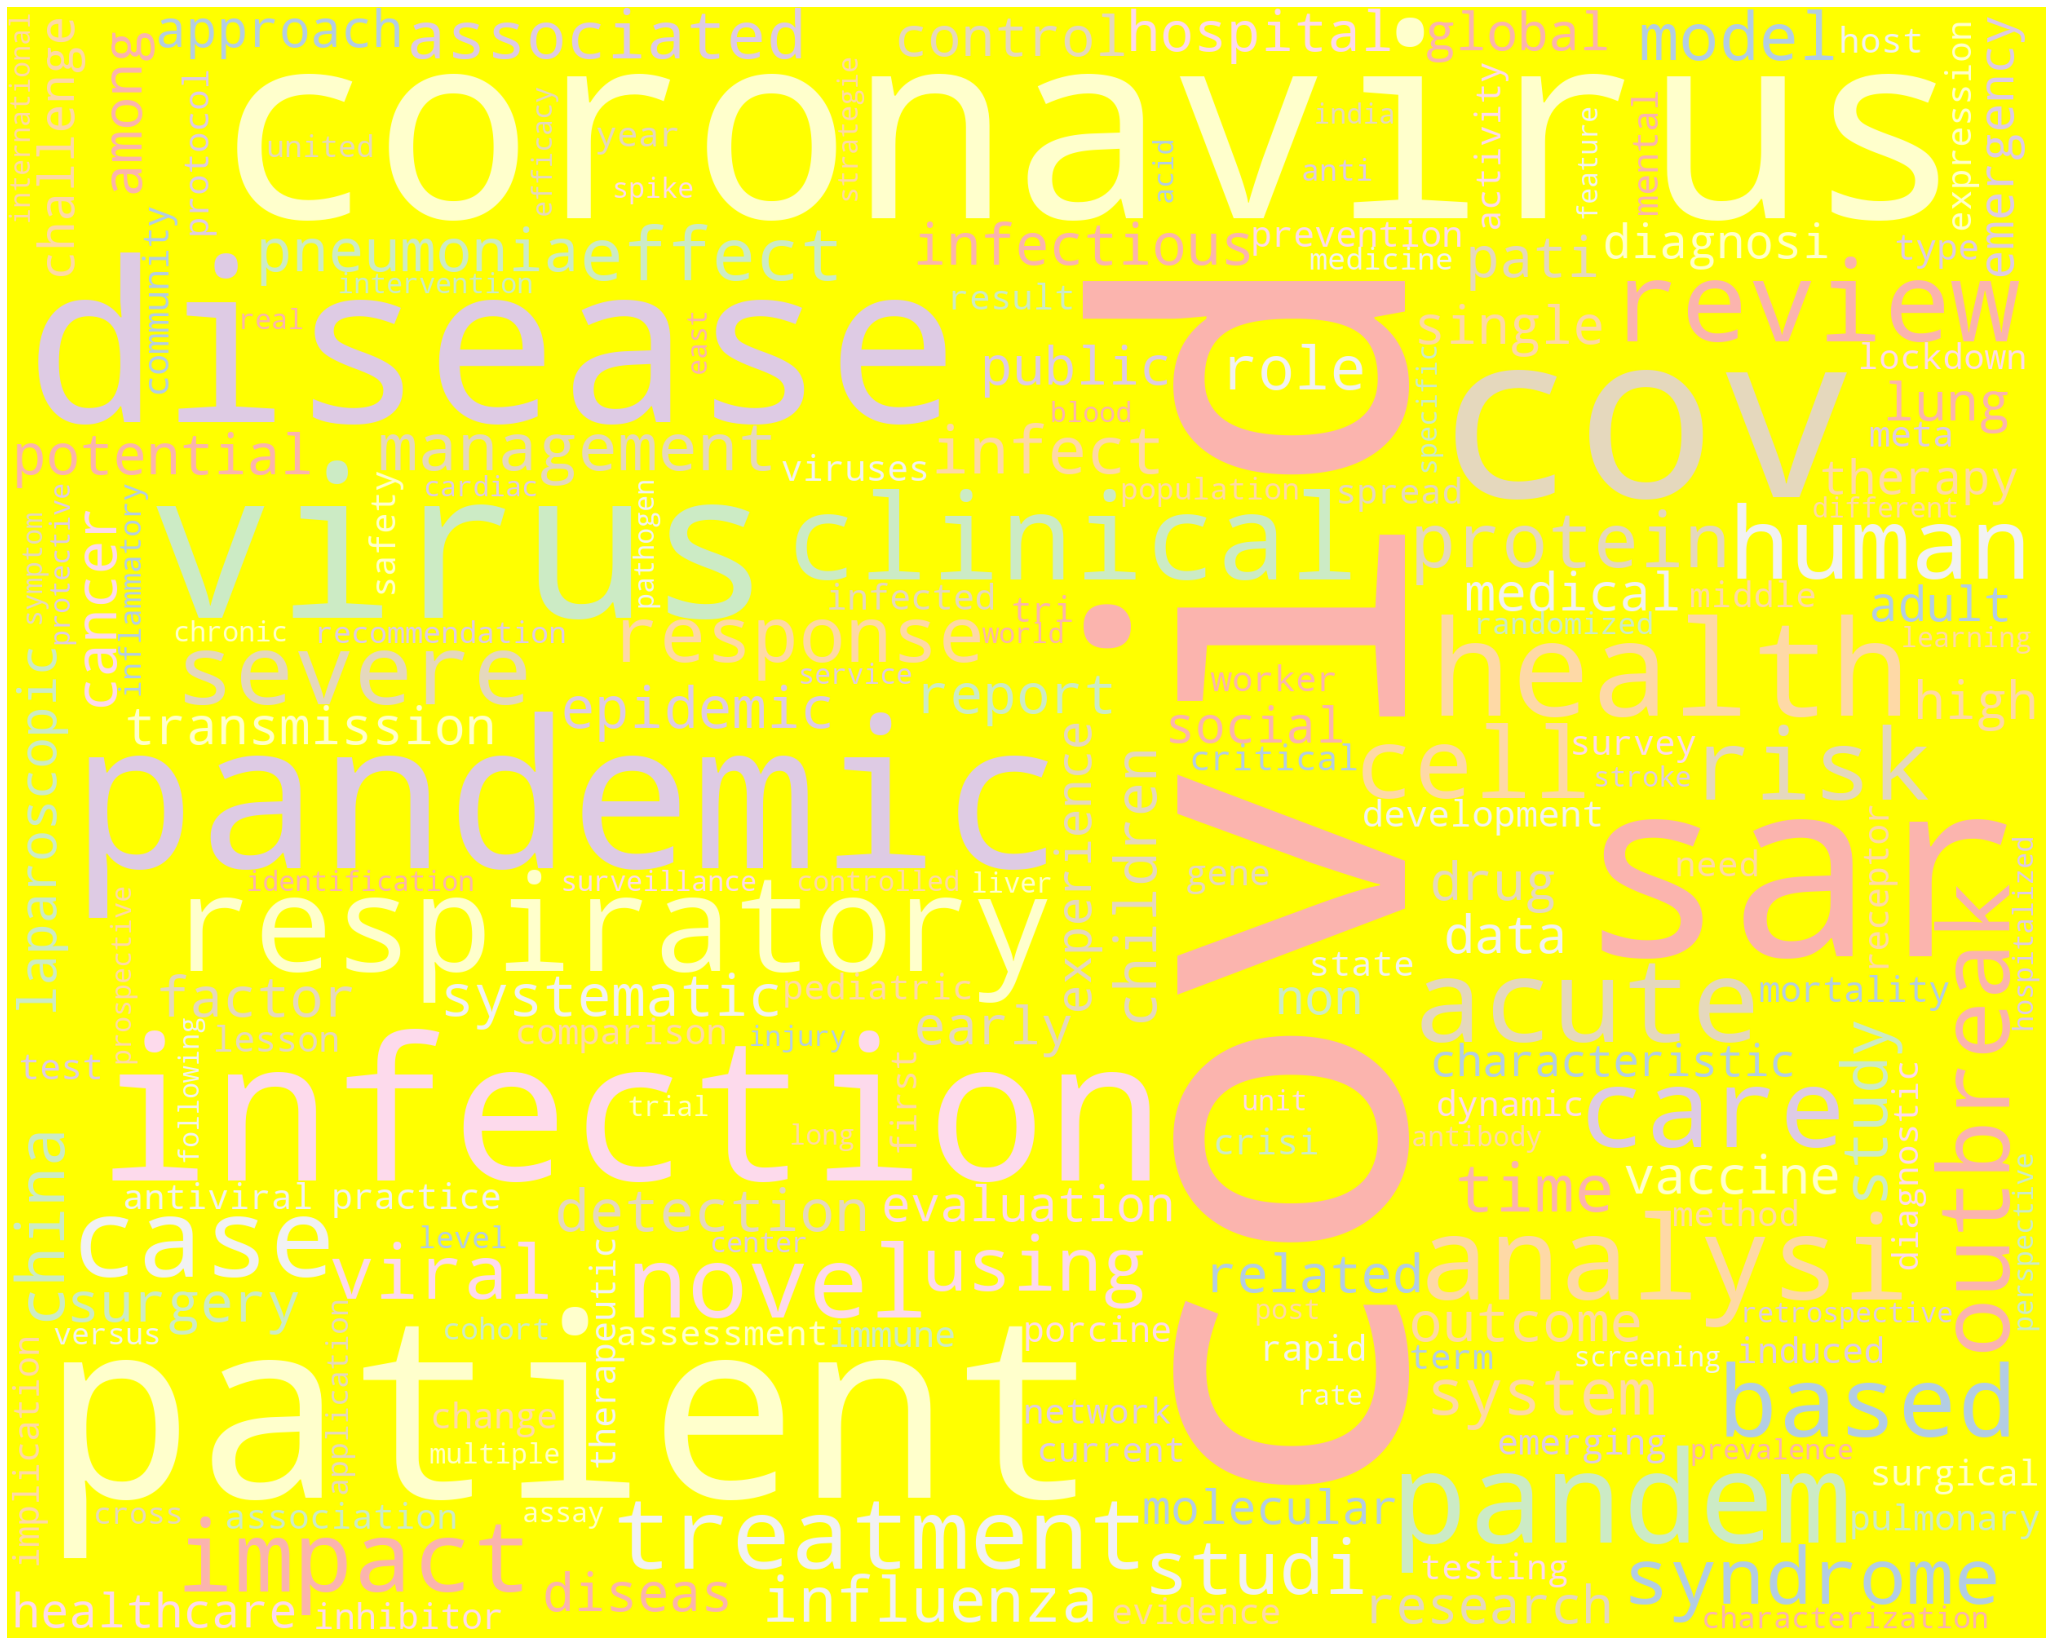

In [ ]:
#this is for the training set
train_set = " ".join(train)
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=35, background_color='yellow', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(train_set)
# Plot
plot_cloud(wordcloud)

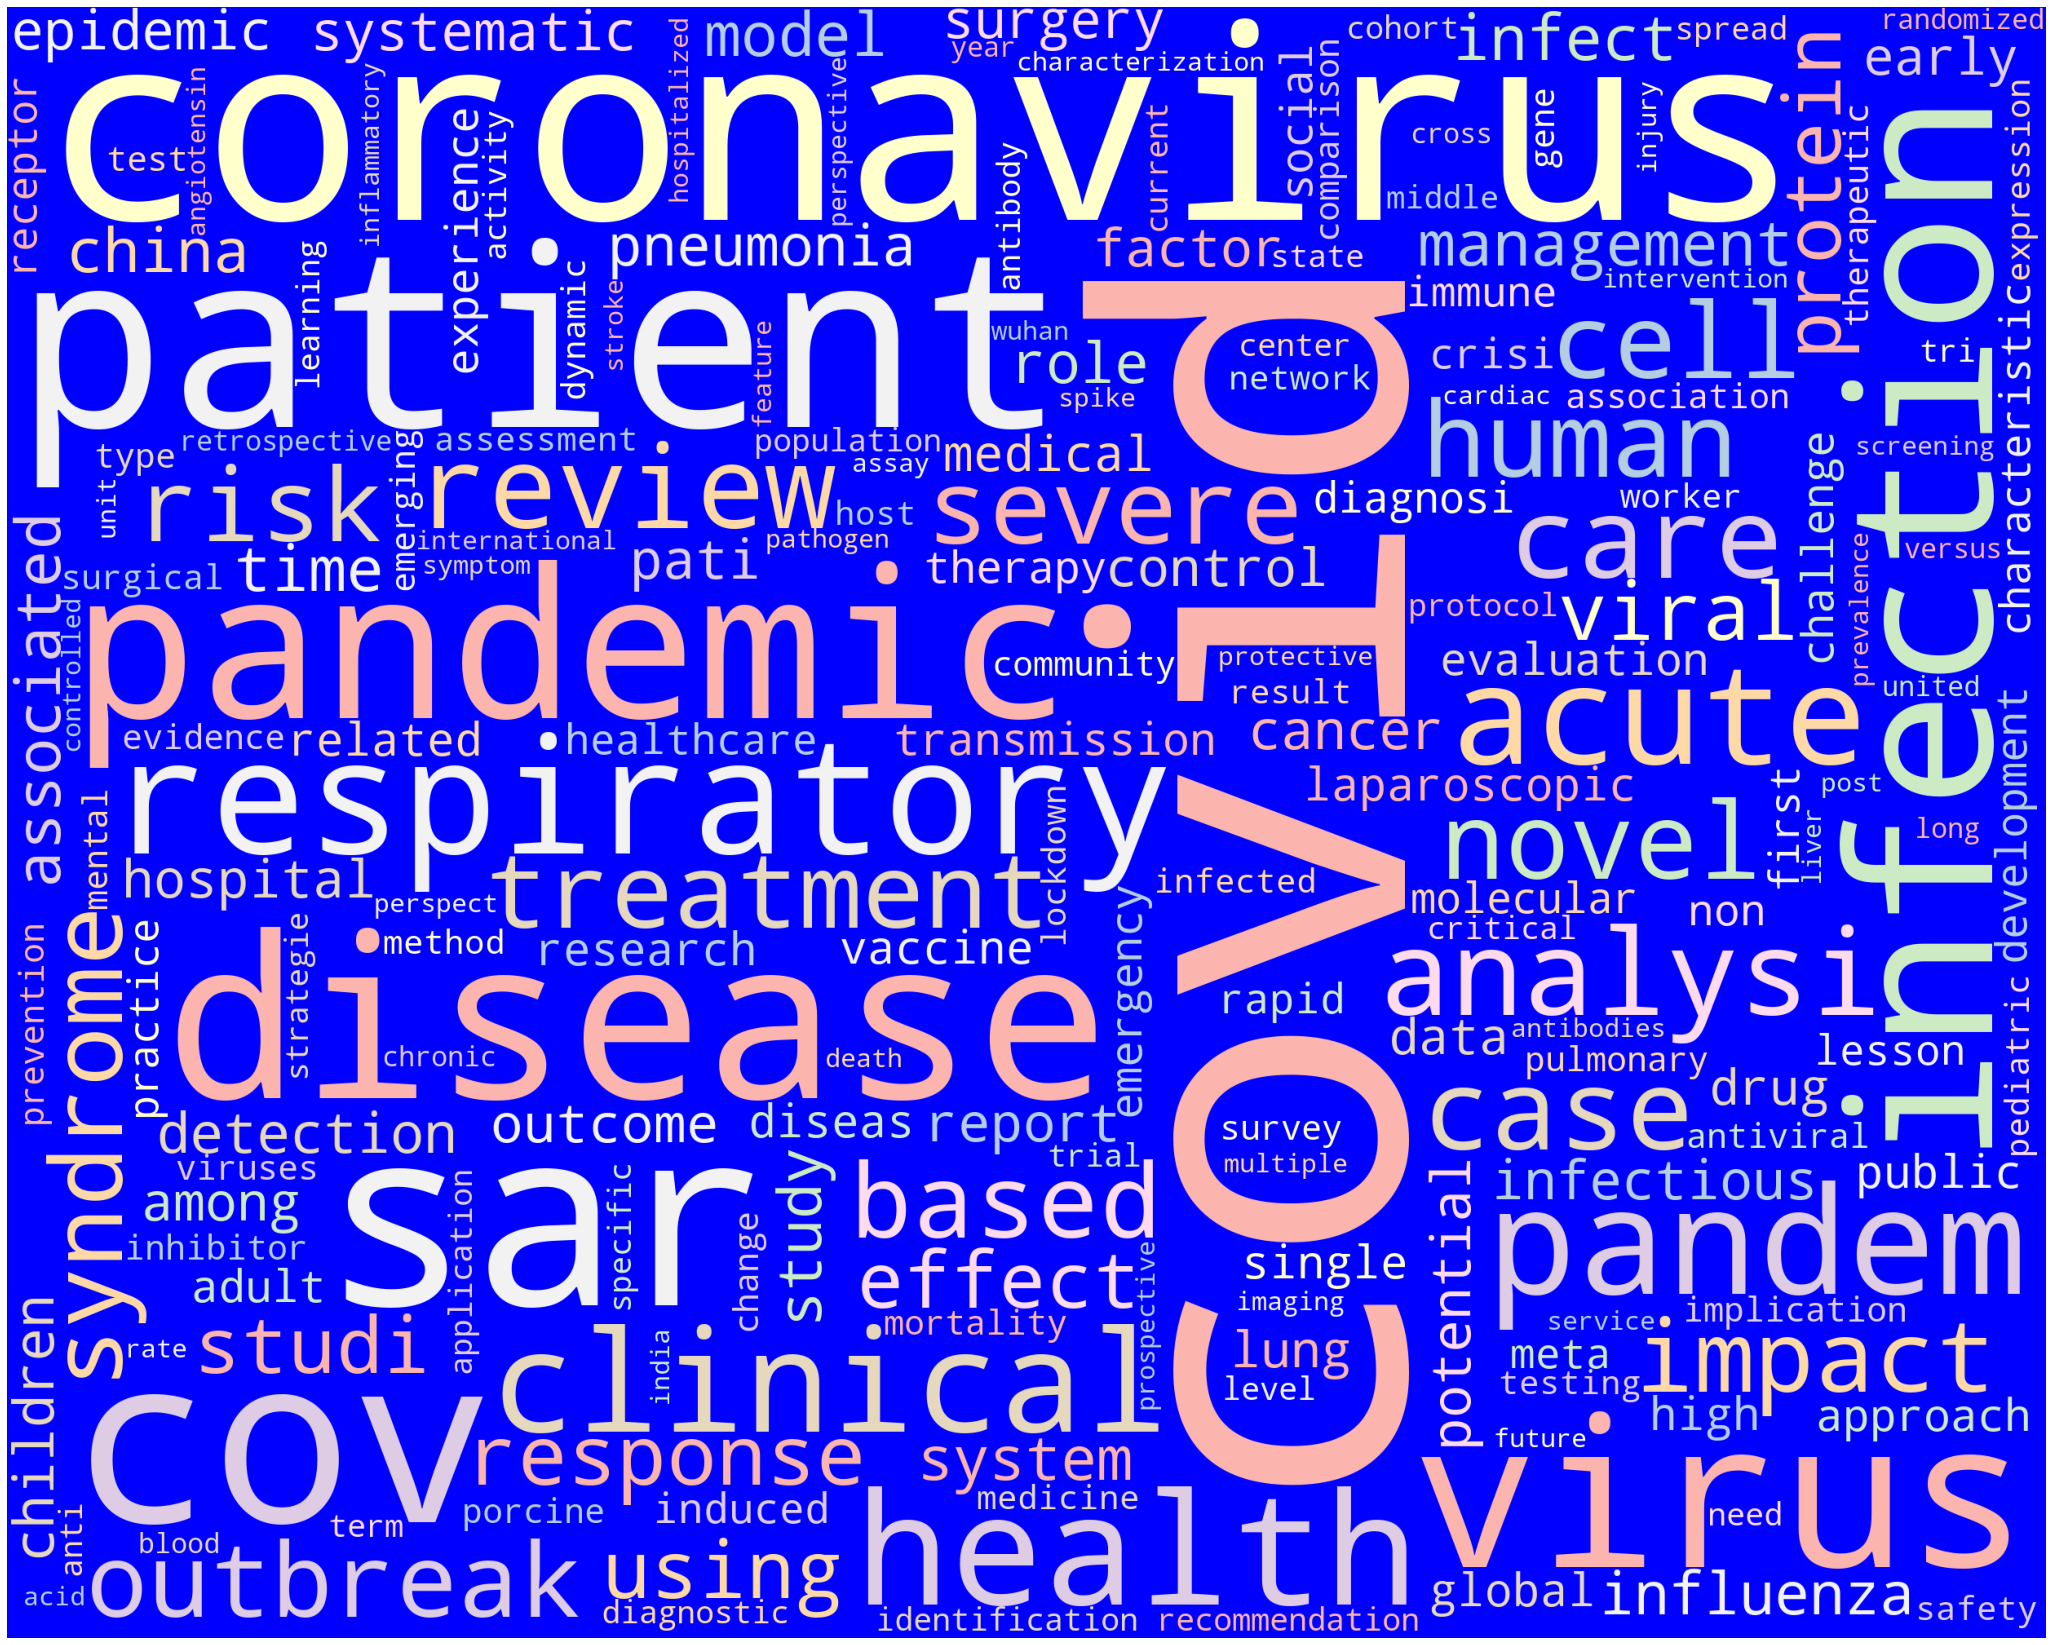

In [ ]:
#this is for the training set
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=35, background_color='blue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(test_set)
# Plot
plot_cloud(wordcloud)

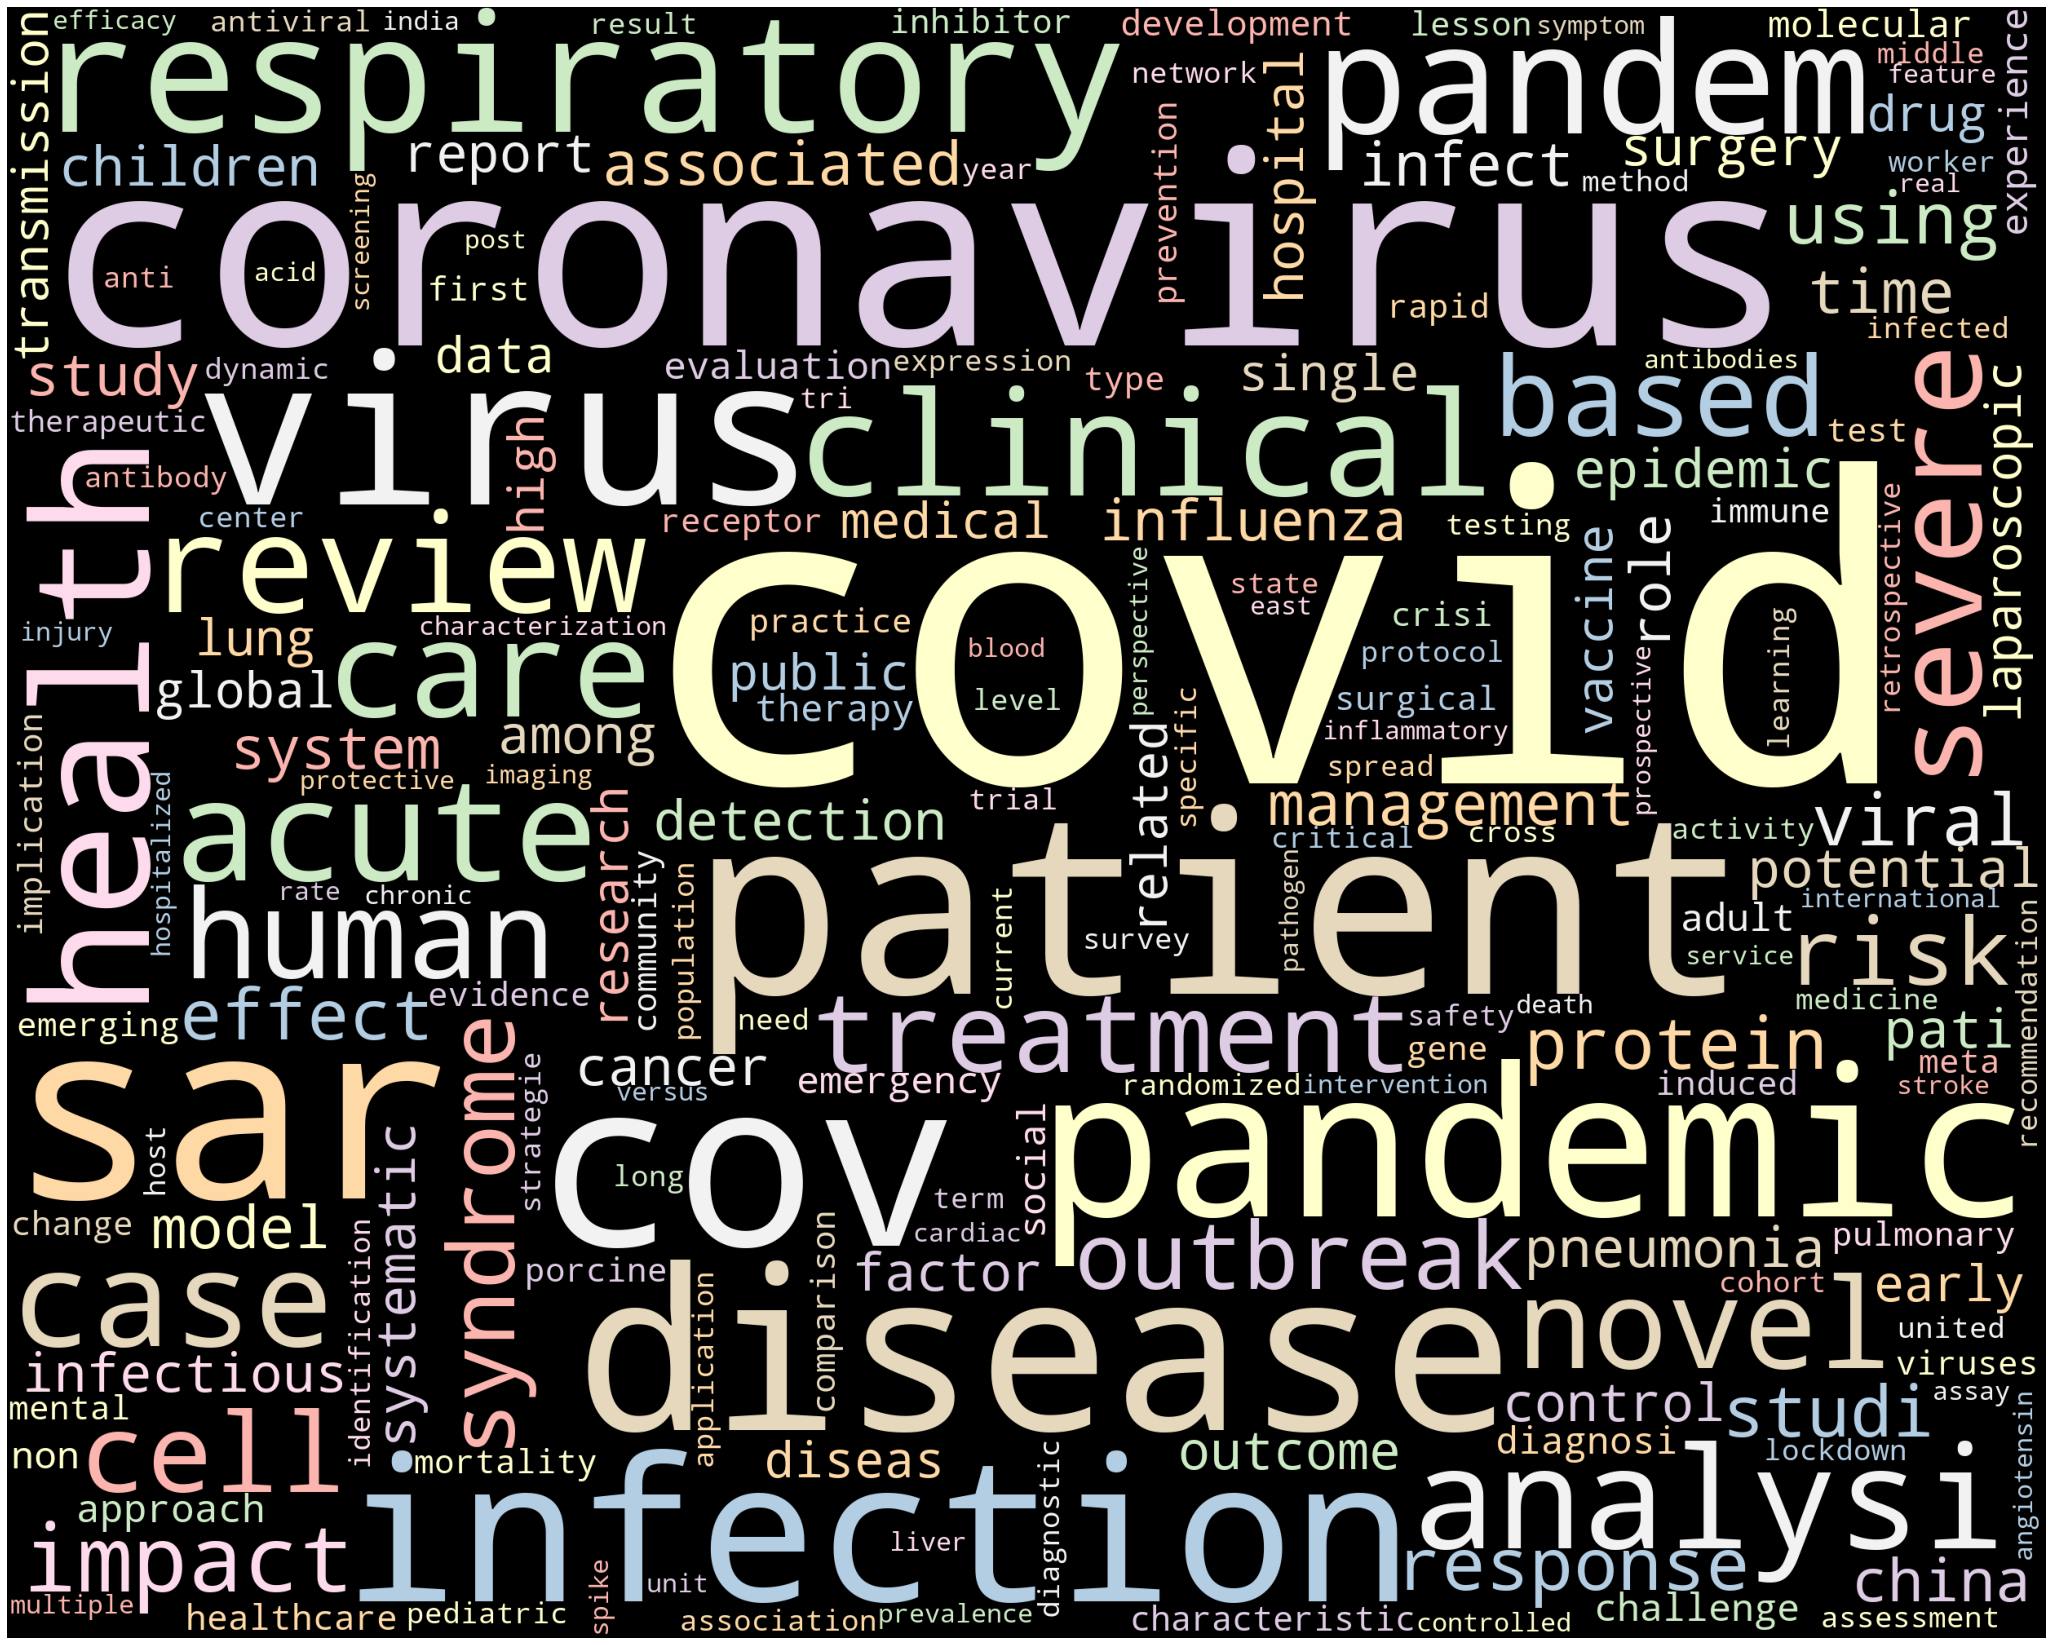

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=5, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(clo)
# Plot
plot_cloud(wordcloud)

In [ ]:
def f(n):
  if n == 0:
    return(1)
  if n == 1:
    return(1)
  return(f(n-1)+f(n-2))

print(f(5))

8


In [ ]:
#number of passes
x_pa = []
y_pa = []
for i in range(10,100,10):
  print(i)
  x_pa.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.16, passes=i,chunksize=100,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_pa.append(h)
  print("------------------")

10


In [ ]:
#number of passes
#topics = 11
x_pa = []
y_pa = []
for i in range(10,100,10):
  print(i)
  x_pa.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, id2word = dictionary, alpha=0.16, passes=i,chunksize=100,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_pa.append(h)
  print("------------------")

10
0.26324383407933144
------------------
20
0.25204398924200105
------------------
30


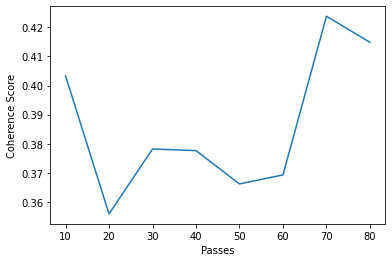

In [ ]:
import matplotlib.pyplot as plt
x_pa_11= [10,20,30,40,50,60,70,80]
y_pa_11 = [0.40331781737116007, 0.35586985475347704 ,0.37817681439734147, 0.37762593574710446,0.3661687676328612, 0.3692695175876635 , 0.4238088075556082,0.4148597053168423 ]
plt.plot(x_pa_11, y_pa_11)
plt.xlabel("Passes")
plt.ylabel("Coherence Score")
plt.show()

In [ ]:
#number of passes
x_pa_10 = []
y_pa_10 = []
for i in range(10,100,10):
  print(i)
  x_pa_10.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, id2word = dictionary, alpha=0.9, passes=i,chunksize=500,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_pa_10.append(h)
  print("------------------")

10
0.40331781737116007
------------------
20
0.35586985475347704
------------------
30
0.37817681439734147
------------------
40
0.37762593574710446
------------------
50
0.36616876763286127
------------------
60
0.3692695175876635
------------------
70
0.4238088075556082
------------------
80
0.4148597053168423
------------------
90


In [ ]:
#number of passes
x_pa_10 = []
y_pa_10 = []
for i in range(10,100,10):
  print(i)
  x_pa_10.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.9, passes=i,chunksize=500,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_pa_10.append(h)
  print("------------------")

10
0.3862818852569897
------------------
20
0.3849102462592735
------------------
30
0.3826034337613936
------------------
40
0.40220944443922235
------------------
50
0.3961982495296242
------------------
60
0.36651177232199417
------------------
70
0.36556190591689275
------------------
80


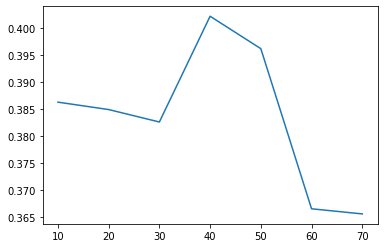

In [ ]:
import matplotlib.pyplot as plt

x_p10 = [0.3862818852569897,0.3849102462592735,0.3826034337613936,0.40220944443922235,0.3961982495296242,0.36651177232199417, 0.36556190591689275]
y_p10 = [10,20,30,40,50,60,70]

plt.plot(y_p10, x_p10)
plt.show()

In [ ]:
#number of passes
x_pa = []
y_pa = []
for i in range(30,40):
  print(i)
  x_pa.append(i)
  lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, alpha=0.16, passes=i,chunksize=10000,per_word_topics=True)
  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  print(coherence_model_lda.get_coherence())
  h = coherence_model_lda.get_coherence()
  y_pa.append(h)
  print("------------------")

  y = [0.44189037840770506,0.39872401847515204,0.3969331094078553,0.3860221347913321,0.4293181104922663,0.42222842771189995,0.42222842771189995,0.3719915186282384,0.42708665678941404,0.43780047200537603]

30
0.44189037840770506
------------------
31
0.39872401847515204
------------------
32
0.3969331094078553
------------------
33
0.3860221347913321
------------------
34
0.38203741821827375
------------------
35
0.4293181104922663
------------------
36
0.42222842771189995
------------------
37
0.3719915186282384
------------------
38
0.42708665678941404
------------------
39
0.43780047200537603
------------------


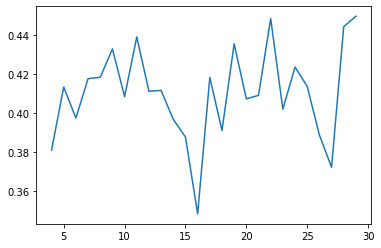

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_pa, y_pa)
plt.show()

In [ ]:
x = [30,31,32,33,34,35,36,37,38,39]
y = [0.44189037840770506,0.39872401847515204,0.3969331094078553,0.3860221347913321,0.4293181104922663,0.42222842771189995,0.42222842771189995,0.3719915186282384,0.42708665678941404,0.43780047200537603]

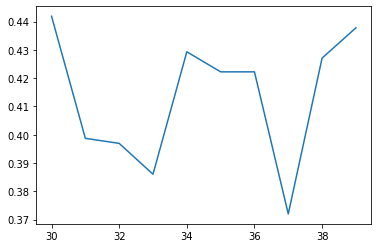

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()